In [3]:
%reload_ext autoreload
%autoreload 2
from brian2 import *
from lz76 import LZ76
from echo_time import *
from functools import partial
from multiprocessing import Pool

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import power_spectral_density as psd
import experiment_10_full_ping_connectome as ex10
#from IPython.display import Image
import scipy.io as spio

from plotlib import *

# Simulation with default parameters

The scaling factor between modules is 20.

In [6]:
data = ex10.run_experiment(
    n_mod=1000,
    duration=20000,
    inter_scaling=50,
)

Setting up synapses... 
	EX_IN_SYN... (279,363 synapses) [0.97s]
	IN_EX_SYN... (399,200 synapses) [1.18s]
	IN_IN_SYN... (99,800 synapses) [0.34s]
	INTER_EX_EX_SYN... (5,713,203 synapses) [32.74s]
All synapses created [35.24s]
Supplying Poisson input to network...  [0.00s]
Running sym...  [881.00s]


In [14]:
show_sim_stats(data)

Simulation lasted 20 seconds
Number of spikes
	Excitatory: 31,496,686 spikes
	Inhibitory: 22,694,911 spikes
	Total: 54,191,597 spikes
Mean firing rate of the network:
	Excitatory neurons: 3.94%
	Inhibitory neurons: 11.37%
	All neurons: 5.43%


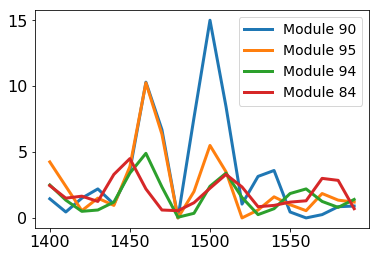

In [25]:
mods = [90, 95, 94, 84]
plot_modules(data, mods, start=1400, end=1600)


31,496,686 exc spikes, 22,694,911 inh spikes


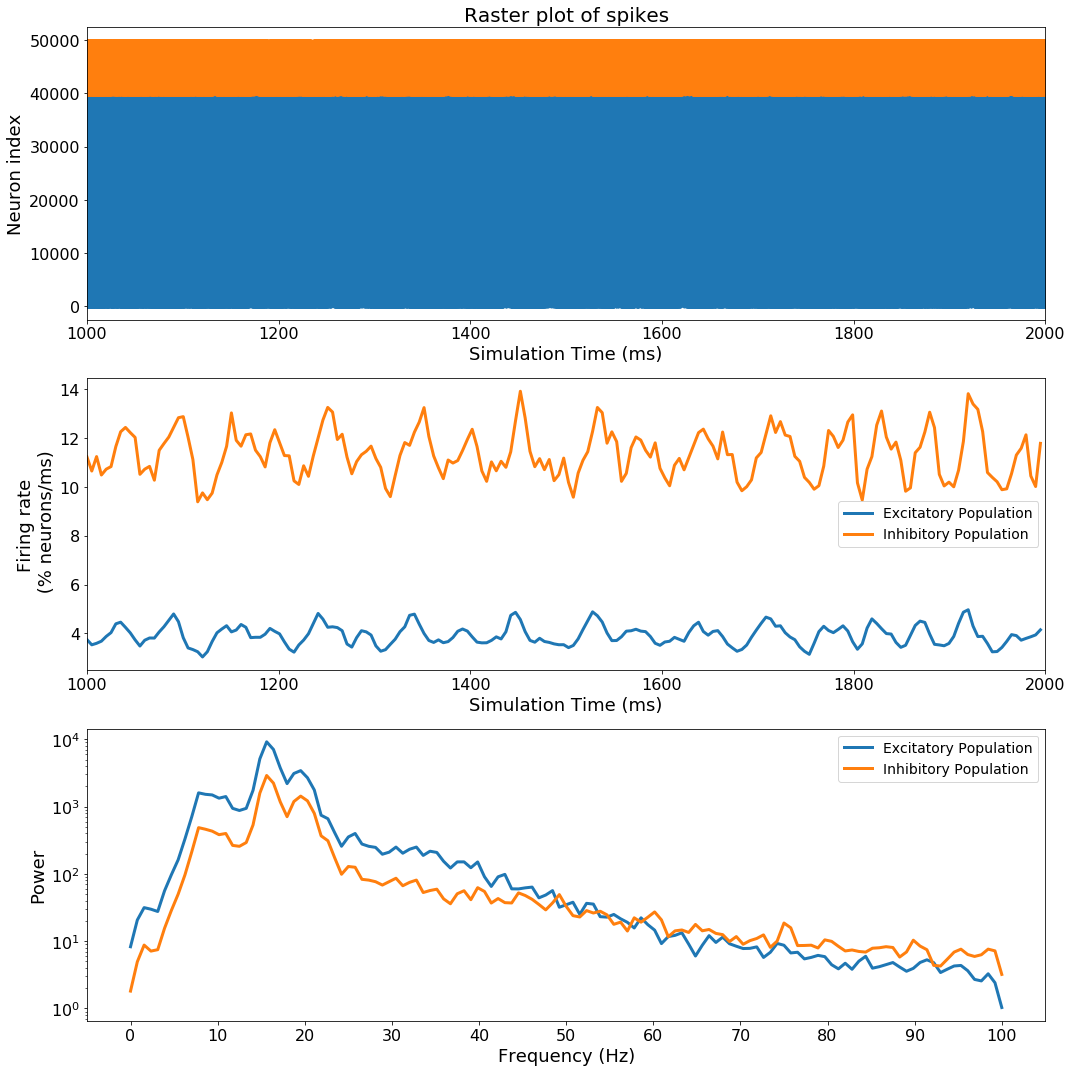

In [19]:
plot_stuff(data, start=1000, end=2000, min_mod=85, max_mod=95)

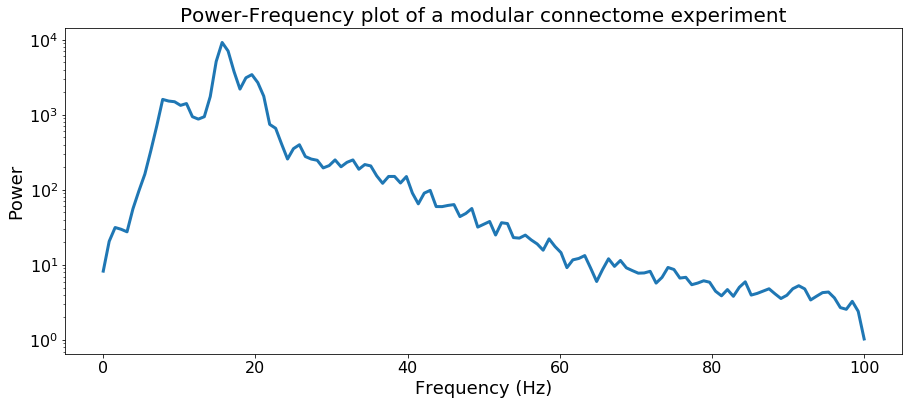

In [17]:
X = data['X']
dt, shift = 5, 5
_, ax = plt.subplots(figsize=(15, 6))
plot_spectrum(X, dt, shift, ax=ax)
ax.set_title('Power-Frequency plot of a modular connectome experiment')
# 20 second full model simulation')
plt.savefig('figures/mod_conn_pow_freq.png')
plt.show()

# Simulation with scaling factor 50


In [4]:
data2 = ex10.run_experiment(n_mod=1000, duration=20000, inter_scaling=50)

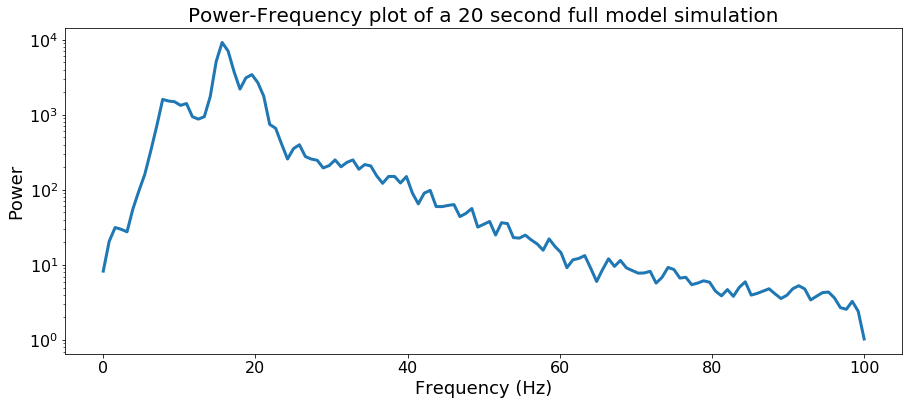

In [5]:
X = data2['X']
dt, shift = 5, 5
_, ax = plt.subplots(figsize=(15, 6))
plot_spectrum(X, dt, shift, ax=ax)
ax.set_title('Power-Frequency plot of a 20 second full model simulation')
plt.show()

In [1]:
# Plot log-log
X = data2['X']
dt, shift = 5, 5
_, ax = plt.subplots(figsize=(15, 6))
plot_spectrum(X, dt, shift, ax=ax)
ax.set_title('Power-Frequency plot of a 20 second full model simulation')
plt.show()

NameError: name 'data2' is not defined

In [18]:
plot_stuff(data2, start=3000, end=3500)#, max_mod=10)

NameError: name 'data2' is not defined

In [256]:
data2 = ex10.run_experiment(n_mod=1000, duration=5000)

Setting up synapses... 
	EX_IN_SYN... (279,752 synapses) [23.58s]
	IN_EX_SYN... (399,200 synapses) [29.09s]
	IN_IN_SYN... (99,800 synapses) [3.86s]
	INTER_EX_EX_SYN... (5,715,001 synapses) [35.14s]
All synapses created [91.71s]
Supplying Poisson input to network...  [0.01s]
Running sym...  [498.73s]


5,200,459 exc spikes, 5,124,550 inh spikes


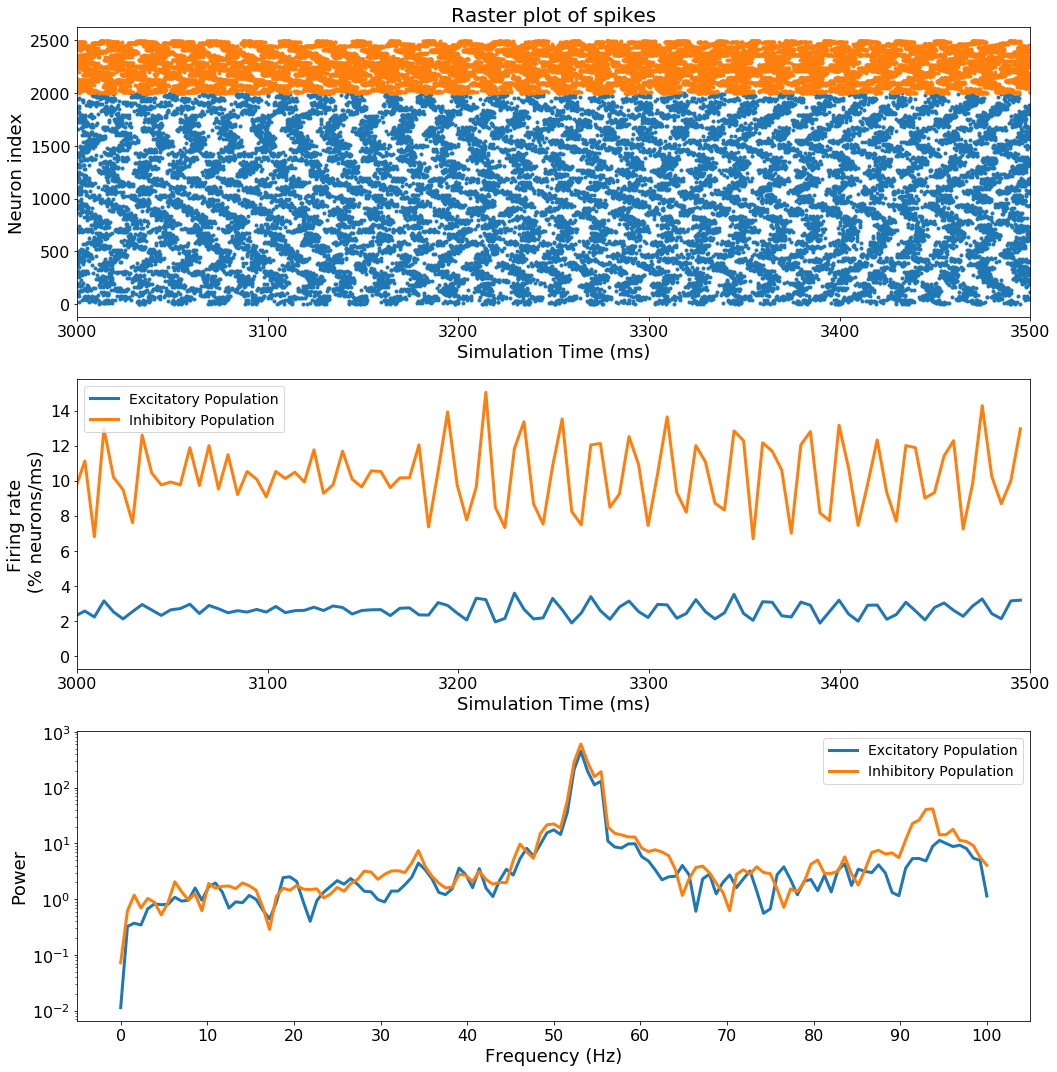

In [257]:
plot_stuff(data2, start=3000, end=3500, max_mod=50)

In [20]:
plot_lz(data)

TypeError: plot_lz() takes at least 5 arguments (1 given)

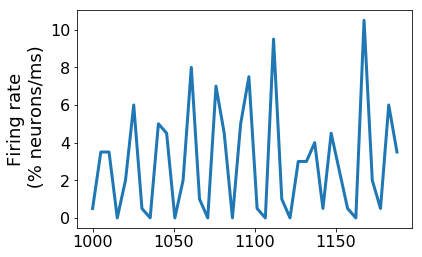

In [249]:
dt, shift = 5, 5
a = modules[0]
start, end = 1000, 1200
mask = np.logical_and.reduce((a >= start, a < end))
plot_ma(n_ex_mod, a[mask], dt, shift)
plt.show()

# Experiment 10 with variability across modules

In [40]:
dat = ex10.run_experiment(n_mod=1000, duration=5000, inter_scaling=50)
#k = range(10)
#sig = [1 for _ in range(10)]
#syn = ex10.get_synapses(10, 5, 10, k, sig, k, sig, 1.0)
#print(syn)

Setting up synapses... 
	EX_IN_SYN... (279,363 synapses) [0.91s]
	IN_EX_SYN... (399,200 synapses) [1.07s]
	IN_IN_SYN... (99,800 synapses) [0.30s]
	INTER_EX_EX_SYN... (5,713,203 synapses) [34.34s]
All synapses created [36.65s]
Supplying Poisson input to network...  [0.00s]
Running sym...  [197.07s]


Module 109: w = 11.8885087994, d = 7.6435270281
9,196,937 exc spikes, 4,938,458 inh spikes


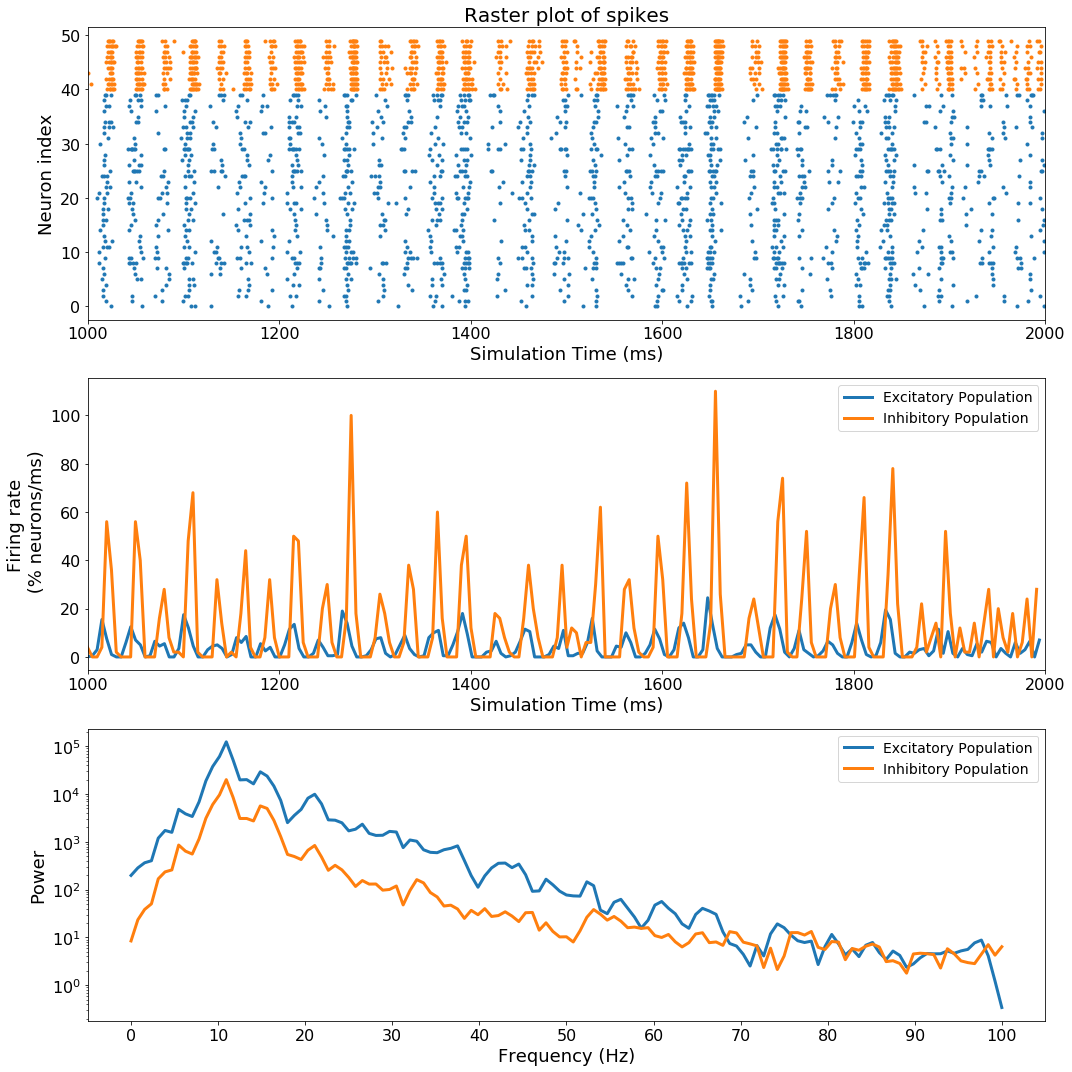

In [48]:
m = np.random.randint(998)
print("Module {}: w = {}, d = {}".format(m, dat['mu_w'][m], dat['mu_d'][m]))
plot_stuff(dat, min_mod=m, max_mod=m+1)

ValueError: setting an array element with a sequence.

In [304]:
def plot_stuff_th(data, start=1000, end=2000, max_mod=None, save=None):
#    N, N_EX, N_IN = 50, 40, 10
    #N, N_EX, N_IN = 100, 80, 20
    n_ex, n_in, n_mod, n_ex_mod, n_in_mod, X, Y, X2, Y2 = [
        data[k]
        for k
        in ['n_ex', 'n_in', 'n_mod', 'n_ex_mod', 'n_in_mod', 'X3', 'Y3', 'X4', 'Y4']
    ]
    n_ex, n_in = 200, 50
    if max_mod:
        n_ex = n_ex_mod * min(n_mod, max_mod)
        n_in = n_in_mod * min(n_mod, max_mod)
    #n_ex = n_ex_mod * min(n_mod, 10)
    #n_in = n_in_mod * min(n_mod, 10)
    start_time = start
    end_time = end
    
    #mask1 = np.logical_and(X >= start_time, X < end_time)
    #mask2 = np.logical_and(X2 >= start_time, X2 < end_time)
    
    print("{:,} exc spikes, {:,} inh spikes".format(len(X), len(X2)))
    
    mask = np.logical_and.reduce((X >= start_time, X < end_time, Y < n_ex))
    mask2 = np.logical_and.reduce((X2 >= start_time, X2 < end_time, Y2 < n_in))
    
    fig, axarr = plt.subplots(3, figsize=(15,15))
    axarr[0].plot(X[mask], Y[mask], '.', color='C0', label='Excitatory Population')
    axarr[0].plot(X2[mask2], Y2[mask2]+n_ex, '.', color='C1', label='Inhibitory Population')
    axarr[0].set_ylabel('Neuron index')
    axarr[0].set_xlabel('Simulation Time (ms)')
    axarr[0].set_title('Raster plot of spikes')
    axarr[0].set_xlim([start_time, end_time])
    #axarr[0].legend(loc=3)
    
    dt, shift = 5, 5
    plot_ma(n_ex, X[mask], dt, shift, ax=axarr[1] , label='Excitatory Population')
    plot_ma(n_in, X2[mask2], dt, shift, ax=axarr[1], label='Inhibitory Population')
    axarr[1].set_xlabel('Simulation Time (ms)')
    axarr[1].set_xlim([start_time, end_time])
    axarr[1].legend()
    
    #fig, axarr = plt.subplots(2, sharex=True, figsize=(15,6))
    plot_spectrum(X, dt, shift, ax=axarr[2], label='Excitatory Population')
    plot_spectrum(X2, dt, shift, ax=axarr[2], label='Inhibitory Population')
    axarr[2].set_xticks(np.arange(0, (1000.0/shift)/2.0 + 1, 10))
    axarr[2].legend()
    
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()



In [61]:
data_th = ex12.run_experiment(n_mod=100, thalamus_modulation=0.01)

Setting up synapses... 
	EX_IN_SYN... (27,891 synapses) [0.09s]
	IN_EX_SYN... (40,000 synapses) [0.24s]
	IN_IN_SYN... (10,000 synapses) [0.03s]
	INTER_EX_EX_SYN... (296,800 synapses) [1.98s]
	TH_OUT_SYN... (80,115 synapses) [0.50s]
	TH_EX_IN_SYN... (7,011 synapses) [0.03s]
	IN_EX_SYN... (10,000 synapses) [0.03s]
	IN_IN_SYN... (2,500 synapses) [0.02s]
All synapses created [2.97s]
Supplying Poisson input to network...  [0.01s]
Running sym...  [28.95s]


1,324,920 exc spikes, 657,812 inh spikes


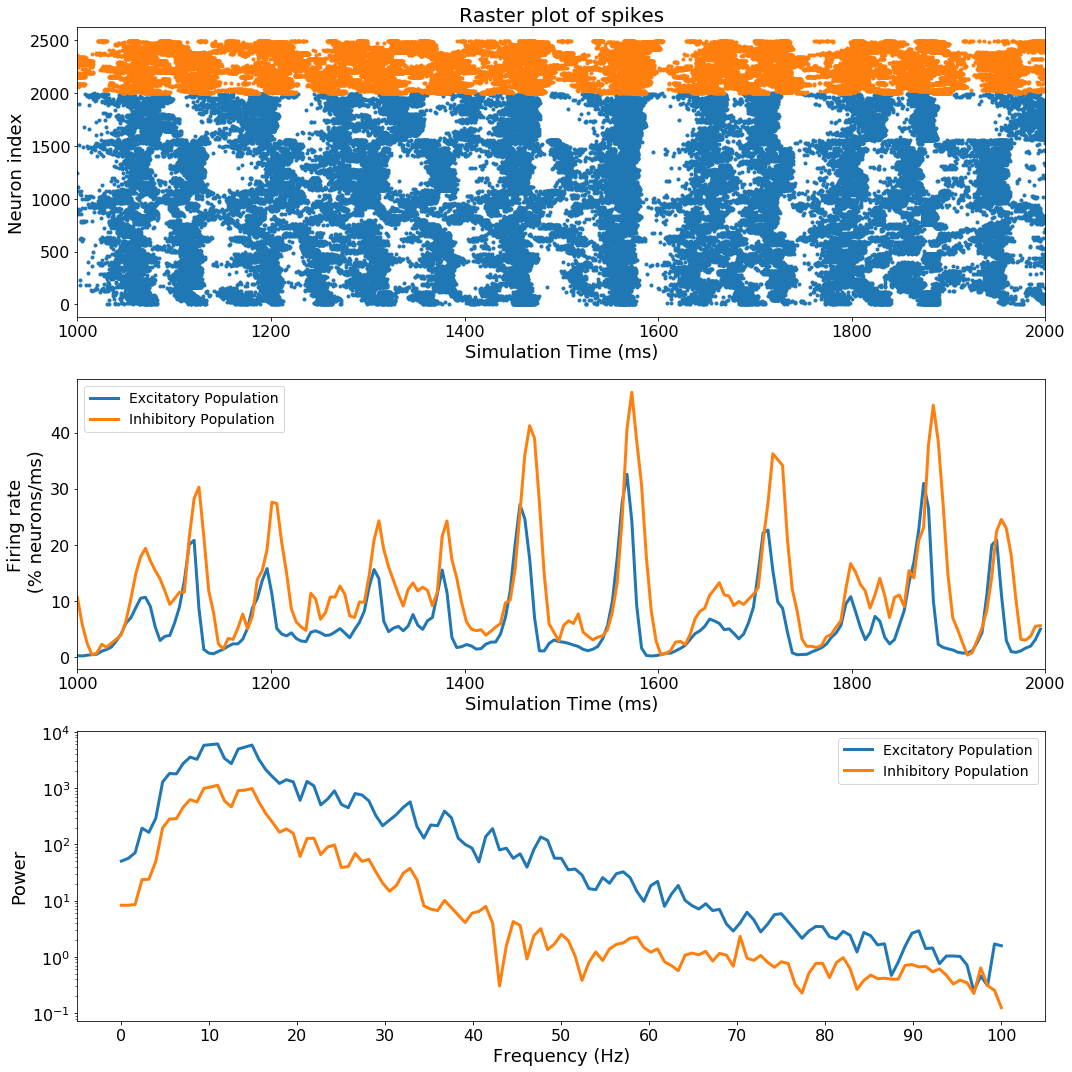

In [62]:
plot_stuff(data_th, max_mod=50)

In [311]:
data_th2 = ex12.run_experiment(n_mod=100, thalamus_modulation=2.0)

Setting up synapses... 
	EX_IN_SYN... (28,064 synapses) [0.32s]
	IN_EX_SYN... (40,000 synapses) [0.38s]
	IN_IN_SYN... (10,000 synapses) [0.08s]
	INTER_EX_EX_SYN... (298,140 synapses) [1.91s]
	TH_OUT_SYN... (80,191 synapses) [0.50s]
	TH_EX_IN_SYN... (6,918 synapses) [0.03s]
	IN_EX_SYN... (10,000 synapses) [0.04s]
	IN_IN_SYN... (2,500 synapses) [0.02s]
All synapses created [3.32s]
Supplying Poisson input to network...  [0.01s]
Running sym...  [33.07s]


2,661,267 exc spikes, 1,813,821 inh spikes


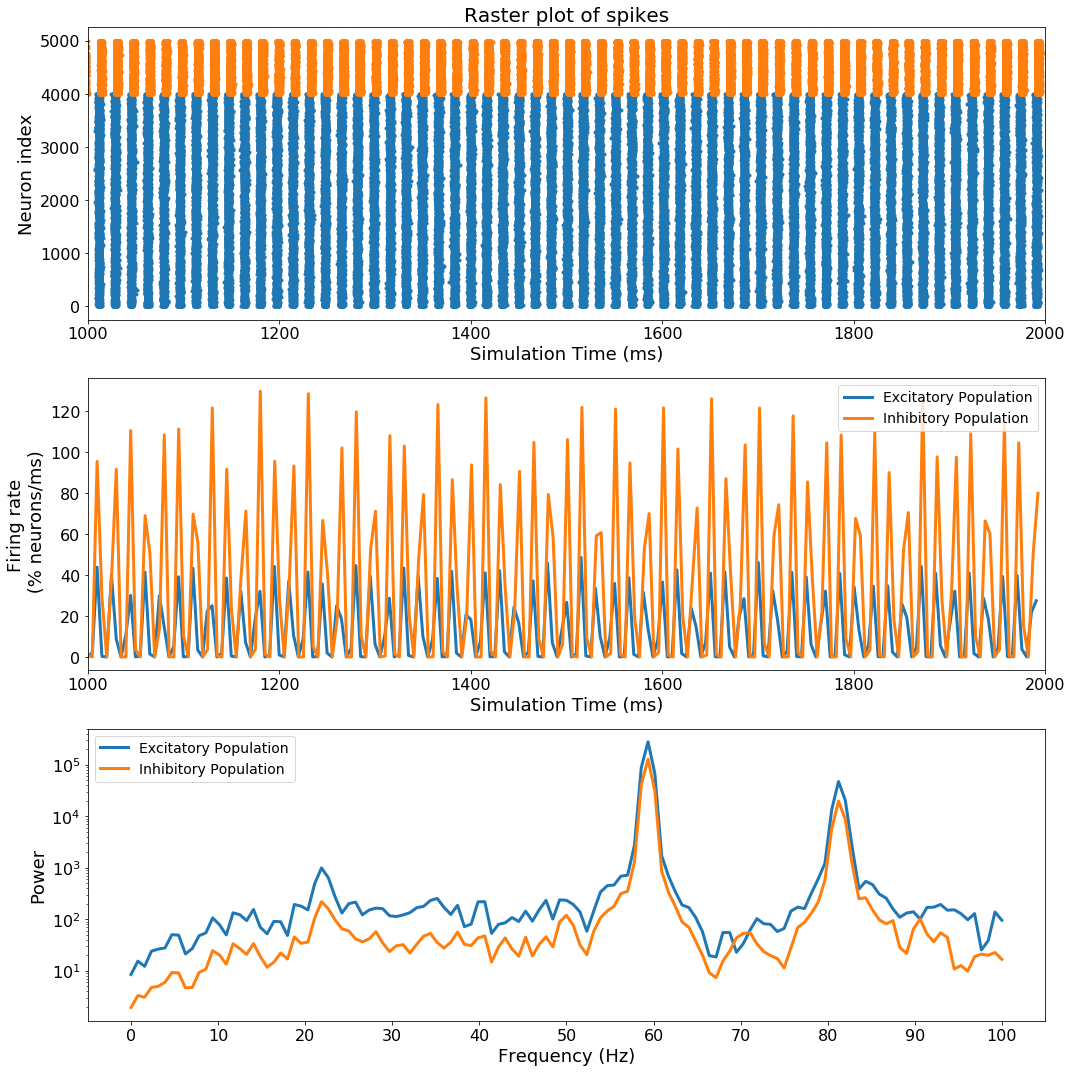

In [312]:
plot_stuff(data_th2)

In [3]:
def ex12_mapper(modulation, inter_scaling=20):
    return ex12.run_experiment(
        n_mod=100,
        thalamus_modulation=modulation,
        inter_scaling=inter_scaling
    )
e = echo_start("Running multipls sims varying the Thalamus modulation... ")
p = Pool(7)
modulation = np.linspace(0, 2, 10)
data_array = p.map(ex12_mapper, modulation)
echo_end(e)
p.close()

In [30]:

s, e, dt, shift = 0, 5000, 5, 5
lz_complexities = []
for d in data_array:
    lz_complexities.append(get_lz_comp(d, s, e, dt, shift))


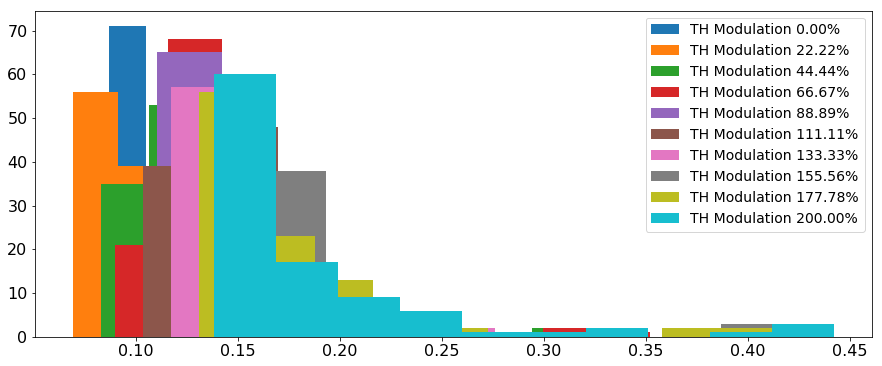

In [36]:

_, ax = plt.subplots(figsize=(15,6))
for lz_c, mod in zip(lz_complexities, modulation):
    plot_lz(lz_c, s, e, dt, shift, ax=ax, label='TH Modulation {:.2f}%'.format(mod*100))
plt.legend()
plt.show()

9,258,237 exc spikes, 2,461,811 inh spikes


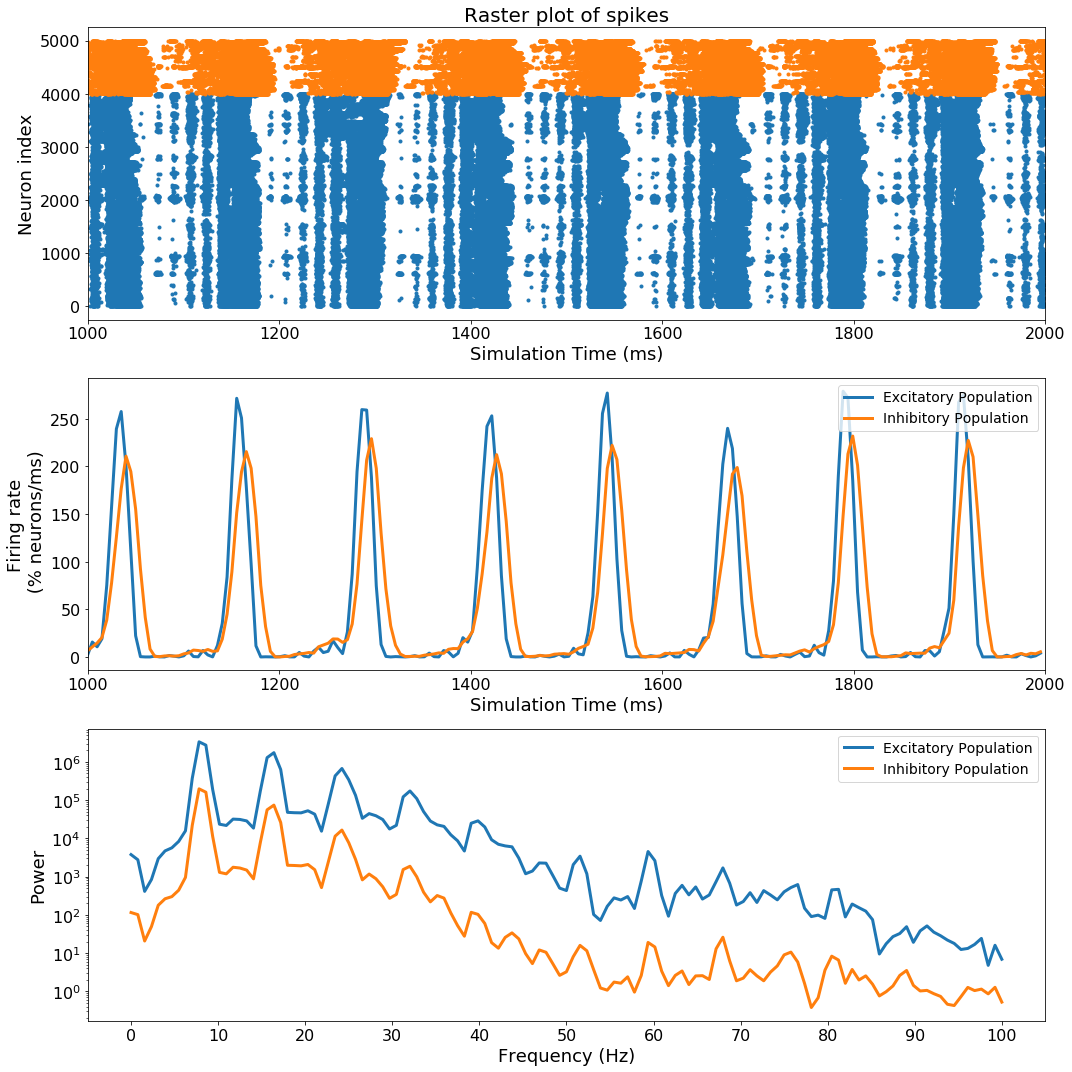

In [38]:
plot_stuff(data_array[-1])

## Compare intermodular weights 

In [75]:
# Todo vary intermodular weithg and plot top 5 neighbourss of module 90 and their moving
# average firing rate
tt = time.time()
def func(arg):
    scaling = arg
    return ex10.run_experiment(
        n_mod=1000,
        inter_scaling=scaling,
        duration=2000
    )

w = [0, 20, 50, 75, 100]
#args = itertools.product(a, b, c, d, exconn, inconn, delays, delays, delays)
pool = Pool(5)
results0 = pool.map(func, w)
pool.close()
print("Time: {}s".format(time.time() - tt))

Time: 219.958179951s


Scaling: 0. Mean firing rate: 2.76485971944
Scaling: 20. Mean firing rate: 3.06135771543
Scaling: 50. Mean firing rate: 3.93055861723
Scaling: 75. Mean firing rate: 8.6507990982
Scaling: 100. Mean firing rate: 19.2783542084


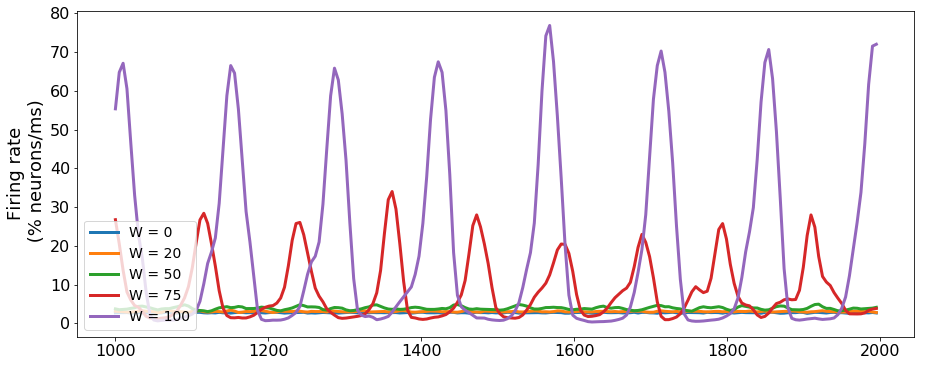

In [64]:
args = w 
dt, shift = 5, 5
start, end = 1000, 2000
_, ax = plt.subplots(figsize=(15,6))
for dat, arg in zip(results0, args):
    scaling = arg
    x = dat['X']
    n = data['n_ex']
    plot_ma(n, x, dt, shift, ax=ax, label='W = {}'.format(scaling))
    ma, _ = psd.moving_average(x, dt, shift, start, end)
    print("Scaling: {}. Mean firing rate: {}".format(scaling, 100.0*ma.mean()/n))
    
ax.legend(loc=3)
plt.show()

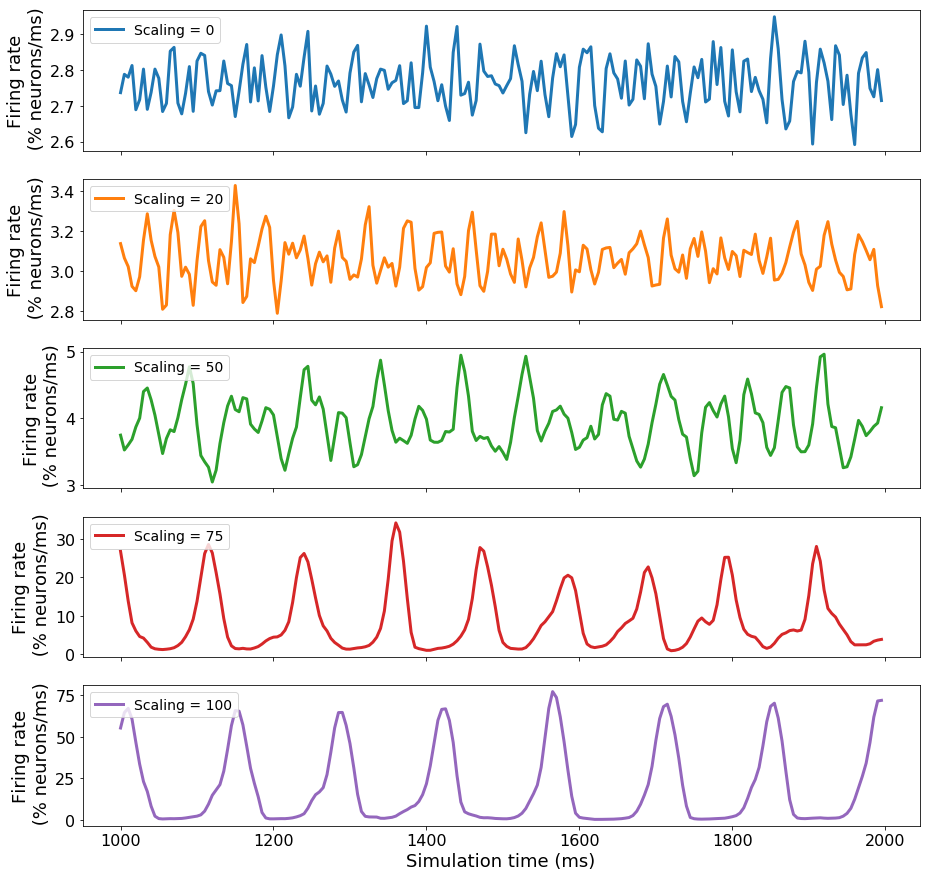

In [103]:
_, axarr = plt.subplots(5, sharex=True, figsize=(15,15))
dt, shift = 5, 5
start, end = 1000, 2000
i = 0
for dat, arg, ax in zip(results0, args, axarr):
    scaling = arg
    x = dat['X']
    n_ex = dat['n_ex']
    plot_ma(n_ex, x, dt, shift, ax=ax, start=start, end=end, label='Scaling = {}'.format(scaling), color='C{}'.format(i))
    ax.legend(loc=2)
    i += 1
axarr[-1].set_xlabel('Simulation time (ms)')
plt.savefig('figures/intermodular_weights.png')
plt.show()
    
    

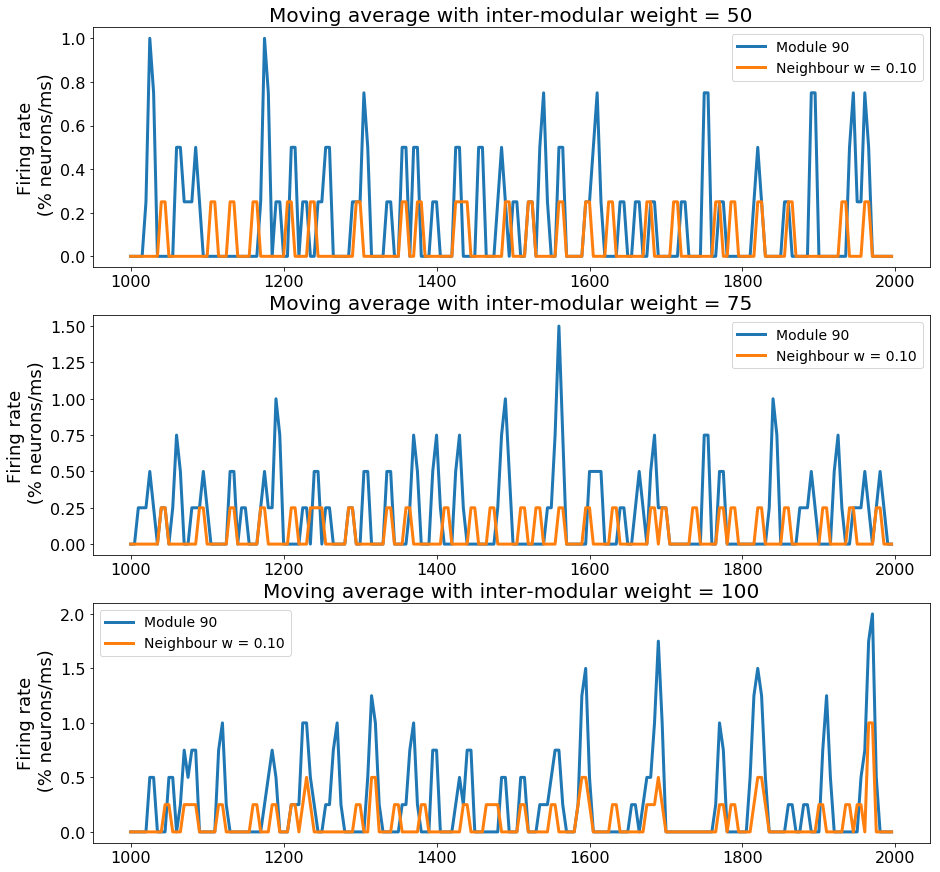

In [87]:
mod = 90
args = w 
top_neighbours = sorted(zip(range(998), CIJ[mod]), key=lambda x: x[1], reverse=True)[:1]
dt, shift = 10, 5
start, end = 1000, 2000
_, axarr = plt.subplots(3, figsize=(15,15))
n_ex = 40
for dat, arg, ax in zip(results0[2:], args[2:], axarr):
    x, y = pd.Series(dat['X']), pd.Series(dat['Y'])
    gb = x.groupby(y)
    x0 = np.array(gb.get_group(mod))
    plot_ma(n_ex, x0, dt, shift, ax=ax, start=start, end=end, label='Module 90')
    for m, wei in top_neighbours:
        x_m = np.array(gb.get_group(m))
        plot_ma(n_ex, x_m, dt, shift, ax=ax, start=start, end=end, label='Neighbour w = {:.2f}'.format(wei))
        
    ax.set_title('Moving average with inter-modular weight = {}'.format(arg))
    ax.legend()
plt.show() 


In [61]:
CIJ = spio.loadmat('data/Conectoma.mat')['CIJ_fbden_average']
max_ws = np.array([max(CIJ[i]) for i in range(998)])

print(max_ws.mean()*20)
print(max_ws.mean()*50)
print(max_ws.mean()*75)
print(max_ws.mean()*100)
#m = np.random.randint(998)
#print(m)
#for i in range(998):
module = 90
top_neighbours = sorted(zip(range(998), CIJ[m]), key=lambda x: x[1], reverse=True)[:5]
print(top_neighbours)
    

1.44892795568
3.6223198892
5.4334798338
7.2446397784
[(205, 0.034731034735311875), (204, 0.027103954927087923), (706, 0.018064550456971386), (705, 0.017793511635423399), (202, 0.017777449343905037)]


## All input to the network through the thalamus

In [88]:
# Todo vary intermodular weithg and plot top 5 neighbourss of module 90 and their moving
# average firing rate

def func(arg):
    scaling = arg
    return ex10.run_experiment(
        n_mod=1000,
        inter_scaling=scaling,
        with_thalamus=True,
        poisson_input=False,
        duration=2000
    )

#w = [0, 20, 50, 75, 100]
w = [0, 25, 50, 100]
#args = itertools.product(a, b, c, d, exconn, inconn, delays, delays, delays)
pool = Pool(5)
results = pool.map(func, w)

Weight 0
3,831,870 exc spikes, 3,097,939 inh spikes


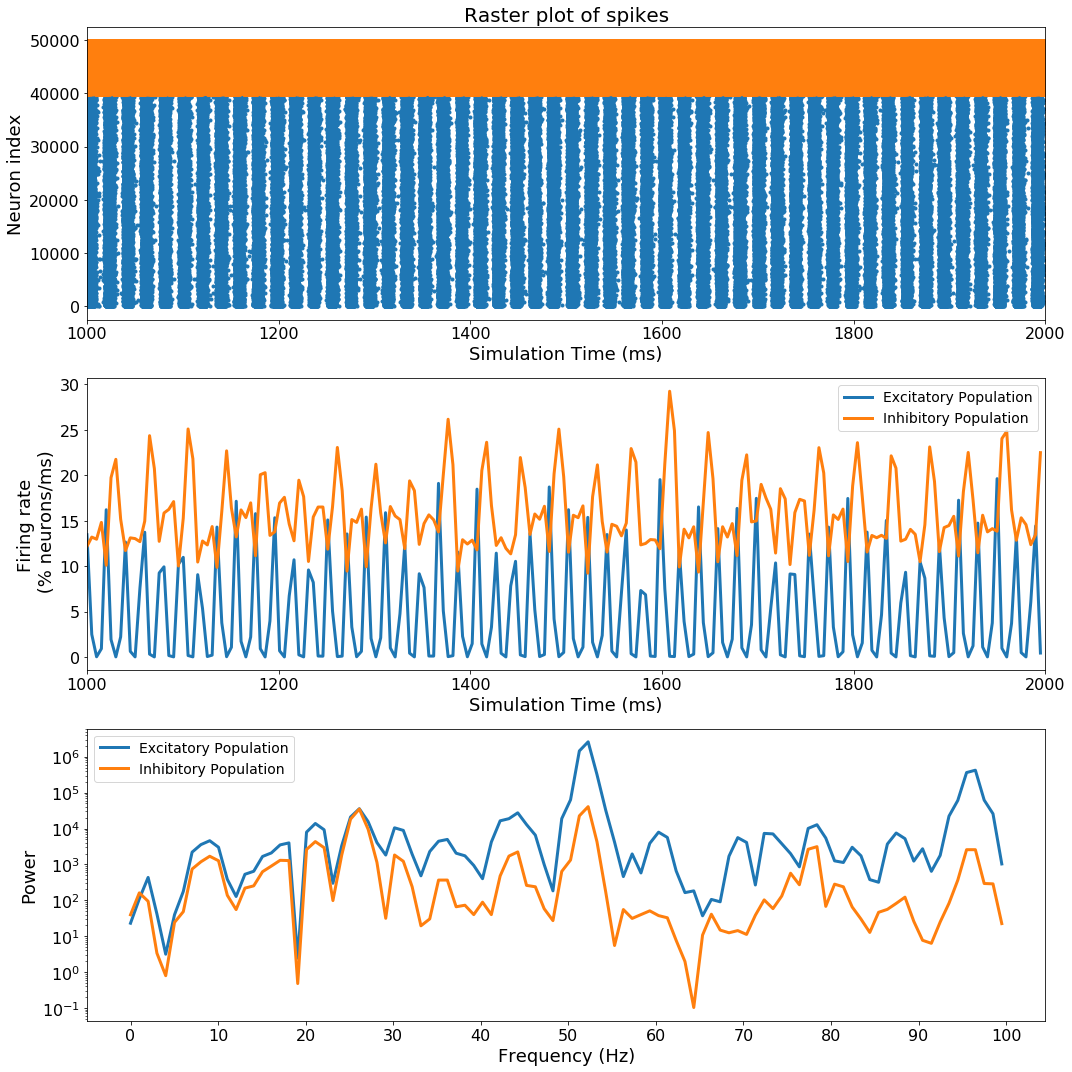

Weight 25
4,198,161 exc spikes, 3,247,449 inh spikes


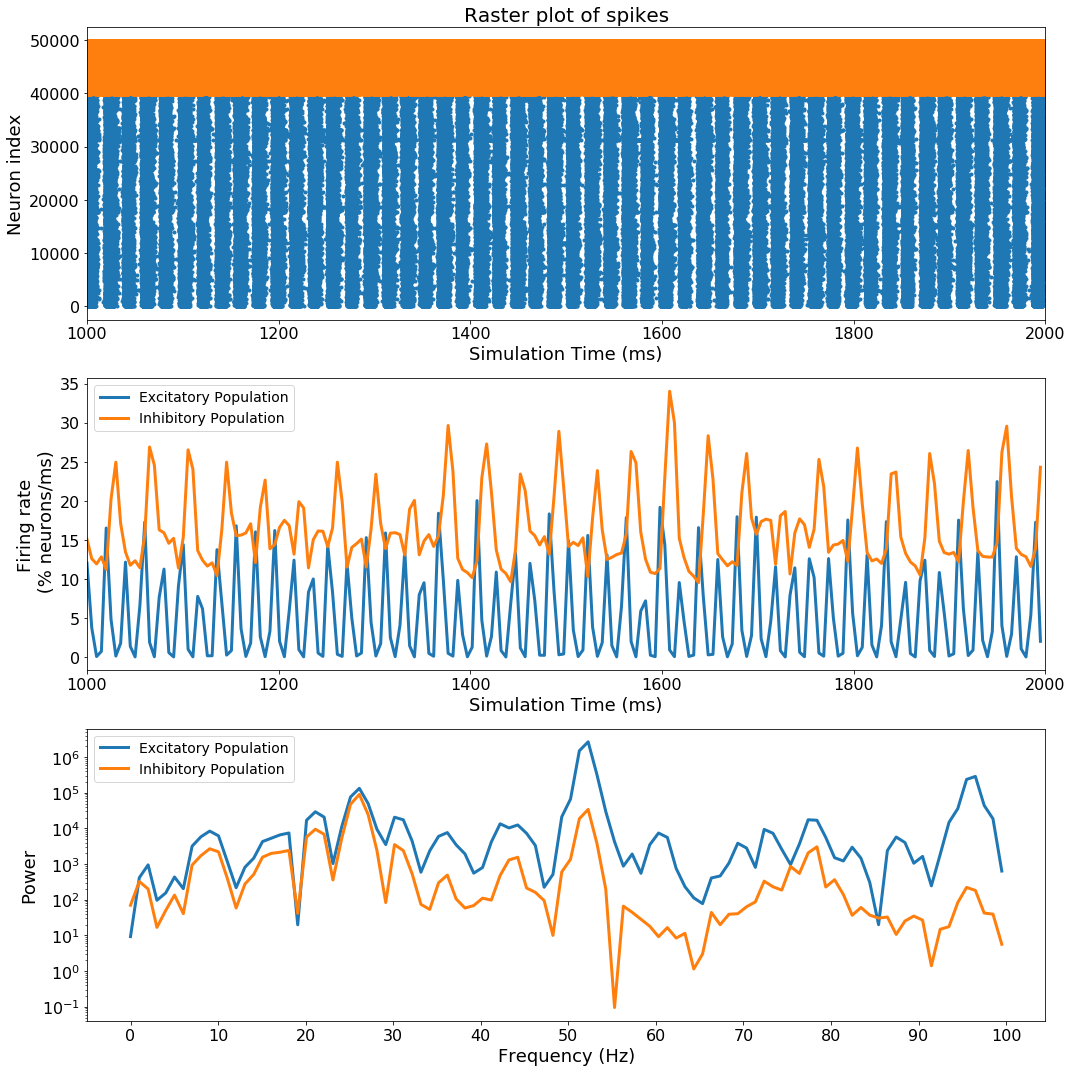

Weight 50
4,927,177 exc spikes, 3,522,443 inh spikes


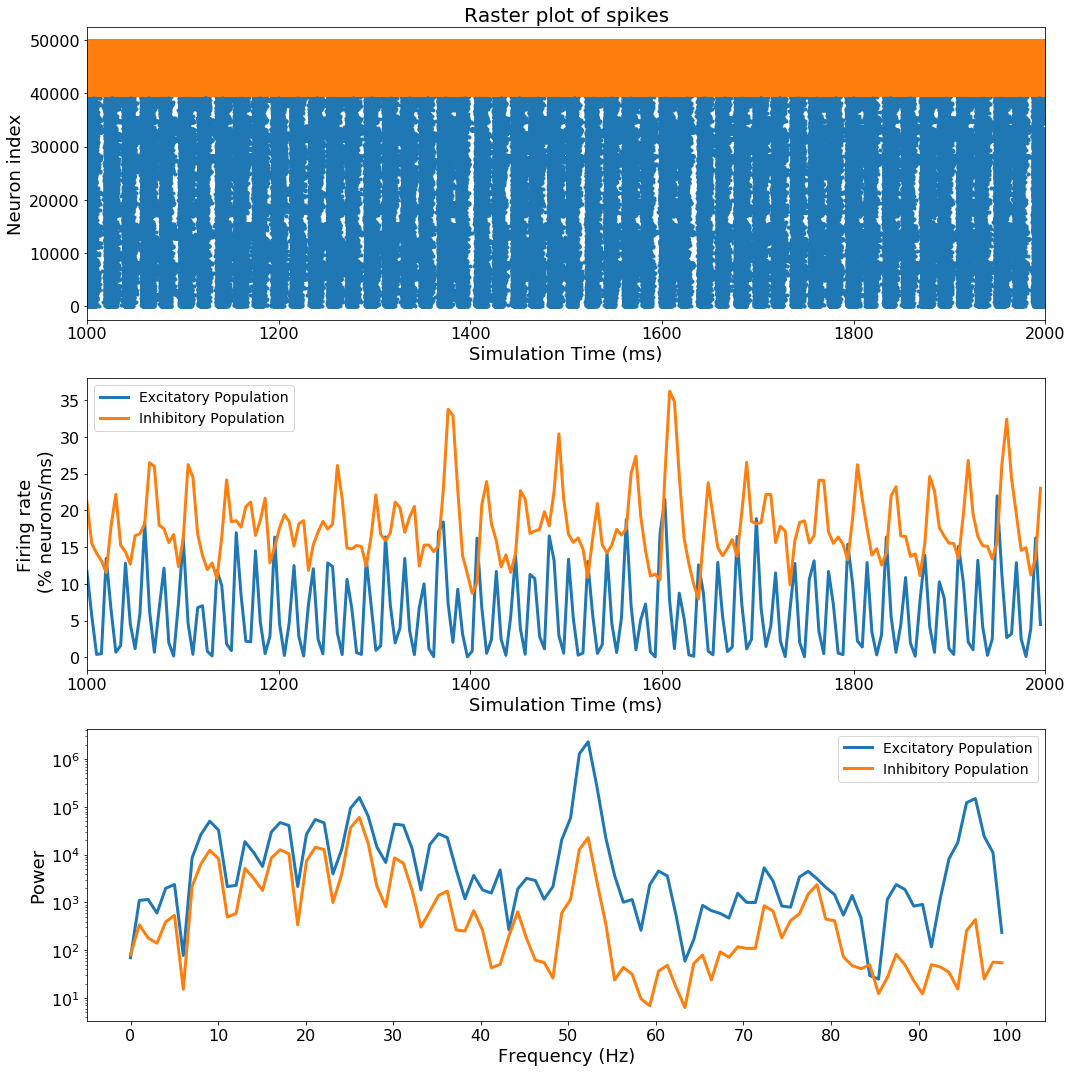

Weight 100
16,177,121 exc spikes, 6,263,950 inh spikes


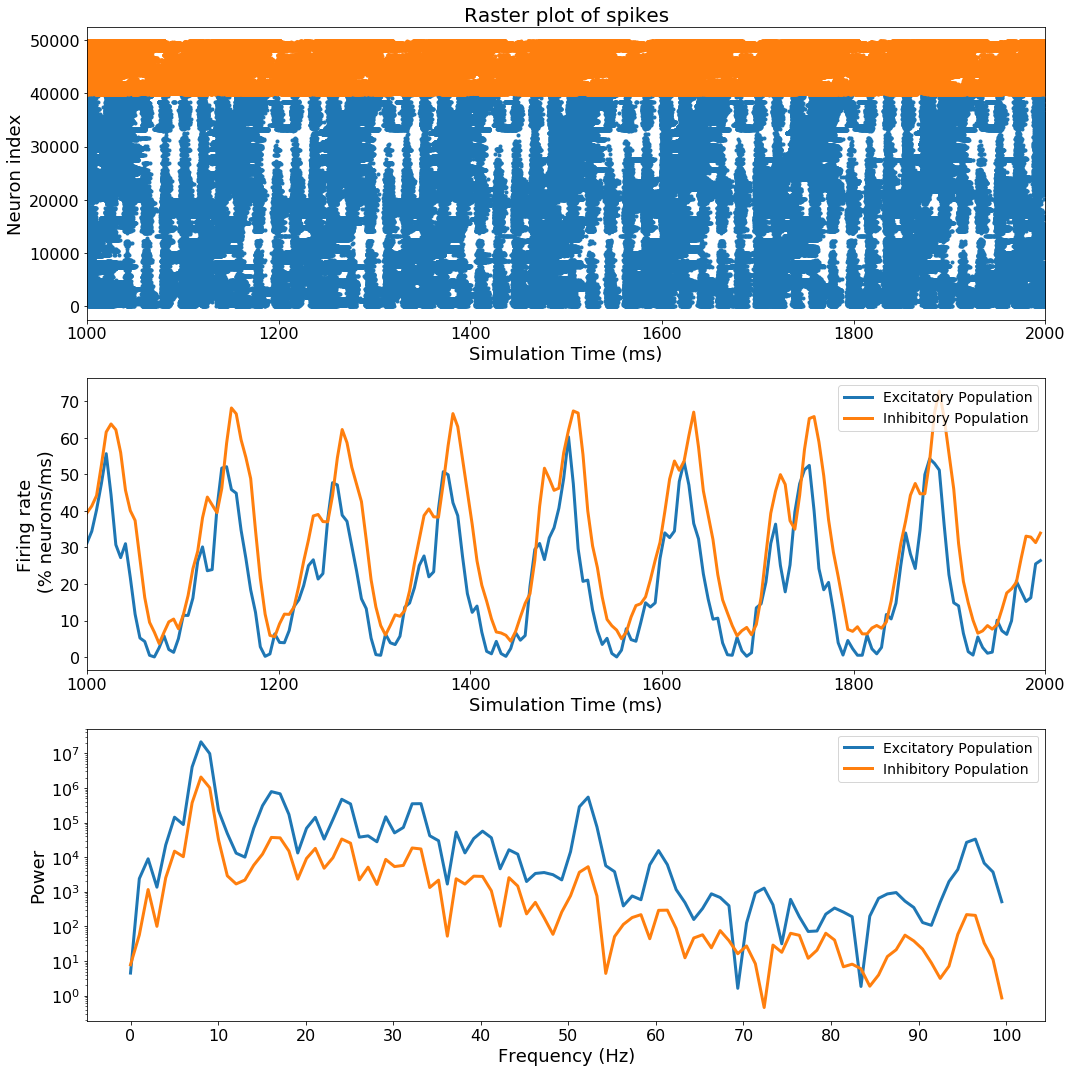

In [95]:
weights = [0, 25, 50, 100]
for r, wei in zip(results, weights):
    print('Weight {}'.format(wei))
    plot_stuff(r)